# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan?

1. Applicants having a credit history; 
2. Applicants with higher applicant and co-applicant incomes;
3. Applicants with higher education level;
4. Applicants who have properties in urban areas with high growth perspectives;

### Besides those, I would like to add a few more hypothesis to be tested:
5. Applicants who are from a mature age, such as from 40s on;
6. Applicants who hold a full-time job;
7. Applicants who requested a smaller amount of loan;
8. Applicants who requested a shorter loan term contract;
9. Applicants who are male.

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset into a df
df = pd.read_csv("customer_dataset.csv") 
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
# Let's check the shape first
df.shape

(614, 13)

In [4]:
# With the shape in mind, we can get the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From this description, we can see that there are missing values in some columns, with a higher number of them present in 'credit_history', 'self_employed', 'dependents', and 'loan_amount' fields. For now, we are going to handle only the missing values of the 'credit_history' column.

In [5]:
# Dropping the rows with missing values under the 'credit_history' column
df = df.dropna(subset = ['Credit_History'])
df.shape

(564, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


Look at some basic statistics for numerical variables.

In [7]:
# Converting the 'ApplicantIncome' to a float64 before getting the statistics
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    float64
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(5), object(8)
memory usage: 61.7+ KB


In [8]:
# Selecting the numeric columns from the df
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_numeric = df[numeric_columns]
df_numeric.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0
613,4583.0,0.0,133.0,360.0,0.0


In [9]:
# Getting the statistics of the numeric columns
df_statistics = df_numeric.describe()
df_statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,543.000000,550.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,83.309428,64.586272,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1105.500000,127.000000,360.000000,1.000000
75%,5803.750000,2250.000000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [10]:
# Counting the number of applicants with a credit history of 1
credit_history_total_applicants = (df_numeric['Credit_History'] == 1).sum()
credit_history_total_applicants

475

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

In [11]:
# In order to answer this question, let's get the comparison of the values between those columns first
df_numeric_income = df_numeric[['ApplicantIncome', 'CoapplicantIncome']]
df_income_columns = df_numeric_income.describe()
df_income_columns


,ApplicantIncome,CoapplicantIncome
count,564.000000,564.000000
mean,5466.436170,1530.448440
std,6271.344106,2471.721359
min,150.000000,0.000000
25%,2892.750000,0.000000
50%,3815.000000,1105.500000
75%,5803.750000,2250.000000
max,81000.000000,33837.000000


From these results, it looks like that there is a significative difference between the income of the applicant and the co-applicant, such as:


- The average income of the applicant is much higher than that of the co-applicant. Specifically, the average income of the applicant is about 3.6 times higher than that of the co-applicant;
- The 'ApplicantIncome' column has a higher degree of variation than the 'CoapplicantIncome' column, as evidenced by the higher standard deviation;
- The minimum income in the 'ApplicantIncome' column is $150, while the minimum income in the 'CoapplicantIncome' column is zero. This suggests that some applicants do not have a co-applicant, or that their co-applicant has no income.

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature?

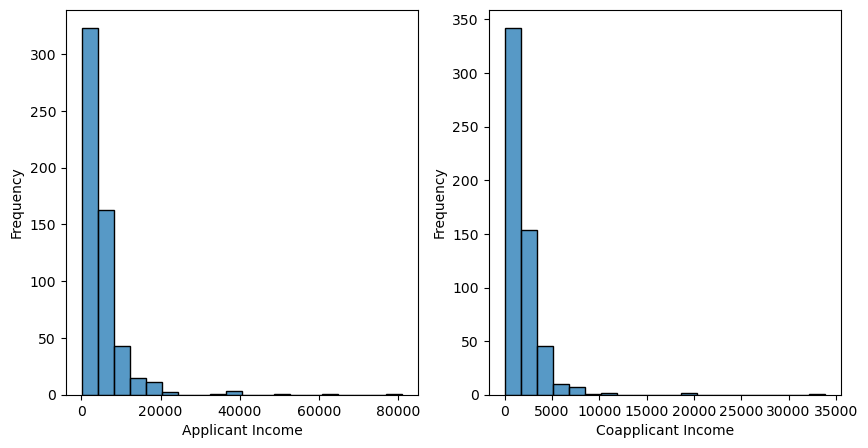

In [17]:
# Finally, let's visualize these 2 columns in a histogram
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting a histogram of ApplicantIncome in the first subplot
sns.histplot(ax=axs[0], data=df_numeric, x='ApplicantIncome', bins=20)
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Frequency')

# Plotting a histogram of CoapplicantIncome in the second subplot
sns.histplot(ax=axs[1], data=df_numeric, x='CoapplicantIncome', bins=20)
axs[1].set_xlabel('Coapplicant Income')
axs[1].set_ylabel('Frequency')

# Displaying the plots
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


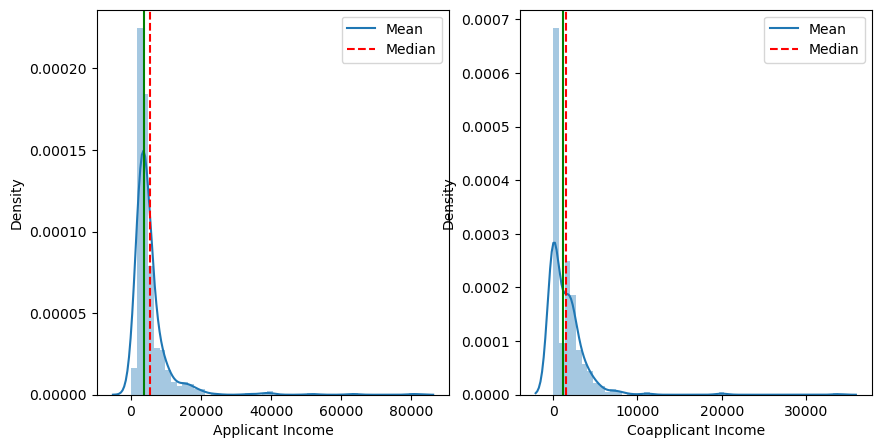

In [24]:
# And also in a distplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting a density plot of ApplicantIncome in the first subplot
sns.distplot(ax=axs[0], a=df_numeric['ApplicantIncome'], kde=True)
axs[0].axvline(df_numeric['ApplicantIncome'].mean(), color='r', linestyle='--')
axs[0].axvline(df_numeric['ApplicantIncome'].median(), color='g', linestyle='-')
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Density')
axs[0].legend({'Mean':df_numeric['ApplicantIncome'].mean(), 'Median':df_numeric['ApplicantIncome'].median()})

# Plotting a density plot of CoapplicantIncome in the second subplot
sns.distplot(ax=axs[1], a=df_numeric['CoapplicantIncome'], kde=True)
axs[1].axvline(df_numeric['CoapplicantIncome'].mean(), color='r', linestyle='--')
axs[1].axvline(df_numeric['CoapplicantIncome'].median(), color='g', linestyle='-')
axs[1].set_xlabel('Coapplicant Income')
axs[1].set_ylabel('Density')
axs[1].legend({'Mean':df_numeric['CoapplicantIncome'].mean(), 'Median':df_numeric['CoapplicantIncome'].median()})

# Displaying the plots
plt.show()


From the provided plots, it can be observed that both the ApplicantIncome and CoapplicantIncome columns are not normally distributed and have a positive skewness, which means they are concentrated towards the lower end of the income scale and have a long right tail. Additionally, ApplicantIncome have a higher kurtosis (tall peak) which indicates a heavy tail on both sides.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [45]:
# In order to answer this question, let's get the categorical columns from the df first
df_categorical_columns = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]
df_categorical = df_categorical_columns
df_categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [46]:
# Getting the number of unique values in each categorical column from the df_categorical
def unique_value(df):
    df_categorical = df.select_dtypes(include=['object'])
    for column in df_categorical.columns:
        print(column, ':', df_categorical[column].nunique())

In [40]:
# Calling up the function
unique_value(df_categorical)

Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
Property_Area : 3
Loan_Status : 2


It is clear that most of the columns represent a binary information, such as gender (F and M), married (Y or N), self-employed (Y or N) and loan status approval (Y or N). This structure of the information is going to help us in the feature enginnering part.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID for obvious reasons.

In [49]:
# Creating a function to get the frequency of the categories in each nominal field
def get_category_frequency(df):
    # Selecting the categorical columns
    df_categorical = df.select_dtypes(include=['object'])
    # Looping through each categorical column and printing the category frequency
    for column in df_categorical.columns:
        print('\n', column, ':')
        print(df[column].value_counts())

In [53]:
# Calling up the function
get_category_frequency(df_categorical)


 Gender :
Male      451
Female    101
Name: Gender, dtype: int64

 Married :
Yes    362
No     199
Name: Married, dtype: int64

 Dependents :
0     316
2      95
1      90
3+     48
Name: Dependents, dtype: int64

 Education :
Graduate        443
Not Graduate    121
Name: Education, dtype: int64

 Self_Employed :
No     463
Yes     75
Name: Self_Employed, dtype: int64

 Property_Area :
Semiurban    217
Urban        182
Rural        165
Name: Property_Area, dtype: int64

 Loan_Status :
Y    385
N    179
Name: Loan_Status, dtype: int64


From these results, we could extract the basic demographics from our customers. In summary, they are most males, married, with no children (no dependents), graduated, working for somebody else (not self-employed), living in a semi-urban area and with a loan already approved.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



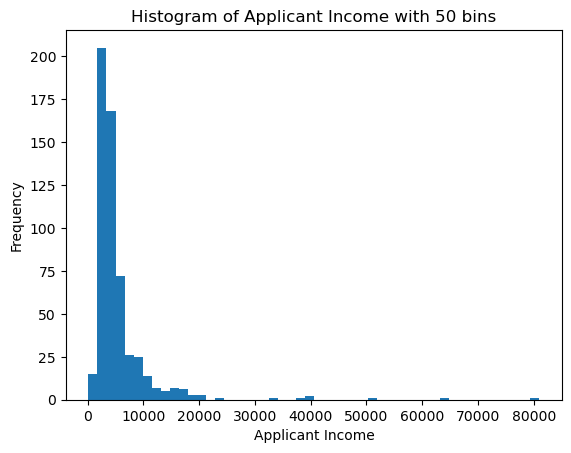

In [80]:
# Plotting the histogram of ApplicantIncome with 50 bins
plt.hist(df_numeric['ApplicantIncome'], bins=50)
plt.title('Histogram of Applicant Income with 50 bins')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

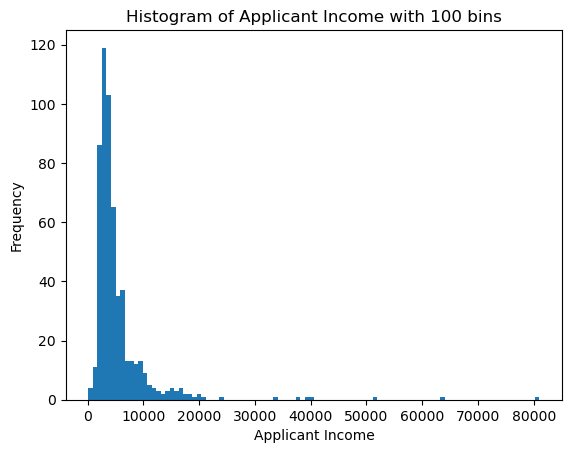

In [81]:
# Plotting the histogram of ApplicantIncome with 100 bins
plt.hist(df_numeric['ApplicantIncome'], bins=100)
plt.title('Histogram of Applicant Income with 100 bins')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

From these 2 histograms, it is noted the presence of some outliers on the right tail of the distribution as this represent fewer applicants with a high income. 

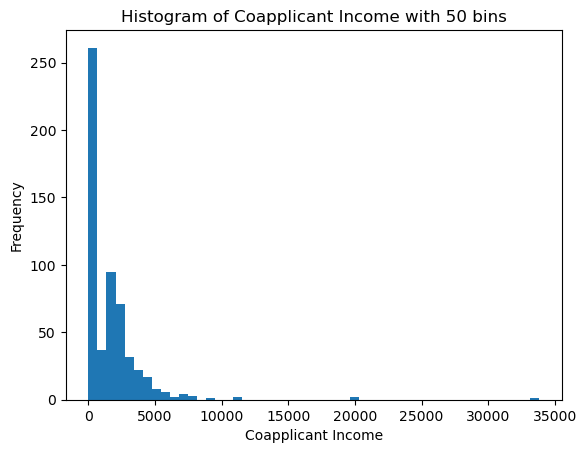

In [83]:
# Plotting the histogram of CoapplicantIncome with 50 bins
plt.hist(df_numeric['CoapplicantIncome'], bins=50)
plt.title('Histogram of Coapplicant Income with 50 bins')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

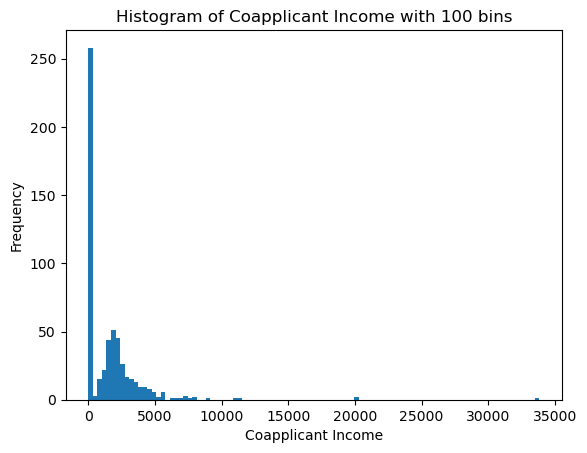

In [84]:
# Plotting the histogram of CoapplicantIncome with 100 bins
plt.hist(df_numeric['CoapplicantIncome'], bins=100)
plt.title('Histogram of Coapplicant Income with 100 bins')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

In regards of the histogram of the co-applicants, we can see that most of them are concentrated between 0 and their mean. Also, there are fewer outliers present.


Look at box plots to understand the distributions. 

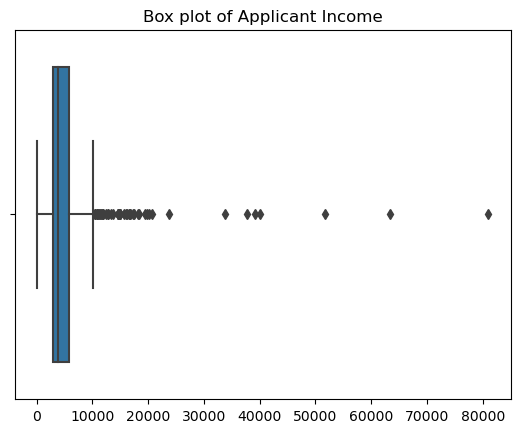

In [115]:
# Box plot of ApplicantIncome
sns.boxplot(x=df_numeric["ApplicantIncome"])
plt.title("Box plot of Applicant Income")
plt.xlabel(None)
plt.show()

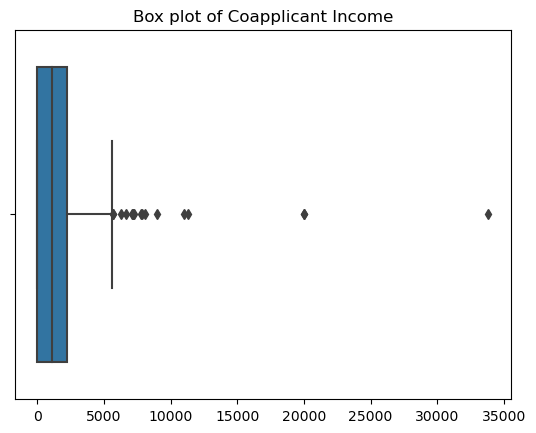

In [116]:
# Box plot of CoapplicantIncome
sns.boxplot(x=df_numeric["CoapplicantIncome"])
plt.title("Box plot of Coapplicant Income")
plt.xlabel(None)
plt.show()

The box plots indicate that the income distribution of co-applicants is flatter with fewer outliers compared to the income distribution of applicants, especially because the income range for co-applicants is relatively narrow compared to that of applicants. Also, the income of the applicants have a higher variation and maximum values as shown by the whiskers and dots.

Look at the distribution of income segregated  by `Education`

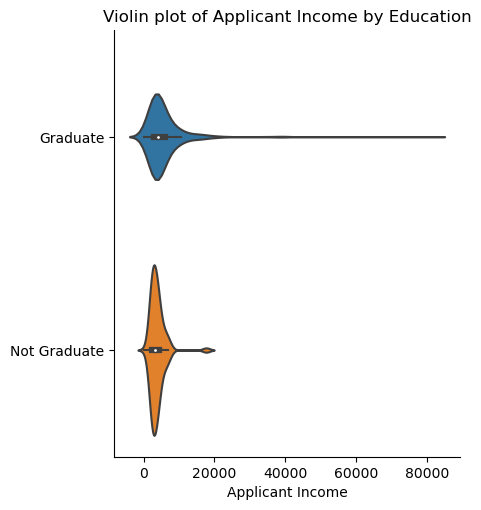

In [118]:
# Creating a violin plot of the ApplicantIncome segregated by Education
sns.catplot(x="ApplicantIncome", y="Education", data=df, kind="violin")
plt.title("Violin plot of Applicant Income by Education")
plt.xlabel("Applicant Income")
plt.ylabel(None)
plt.show()

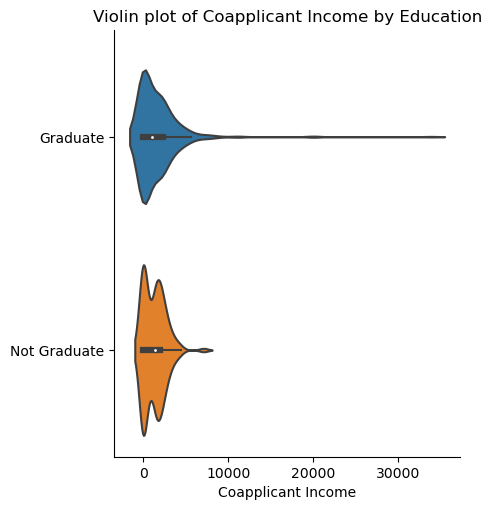

In [119]:
# Creating a violin plot of the CoapplicantIncome segregated by Education
sns.catplot(x="CoapplicantIncome", y="Education", data=df, kind="violin")
plt.title("Violin plot of Coapplicant Income by Education")
plt.xlabel("Coapplicant Income")
plt.ylabel(None)
plt.show()

From those violin plots, most of the applicants and co-applicants with a higher income are graduated.

Look at the histogram and boxplot of LoanAmount

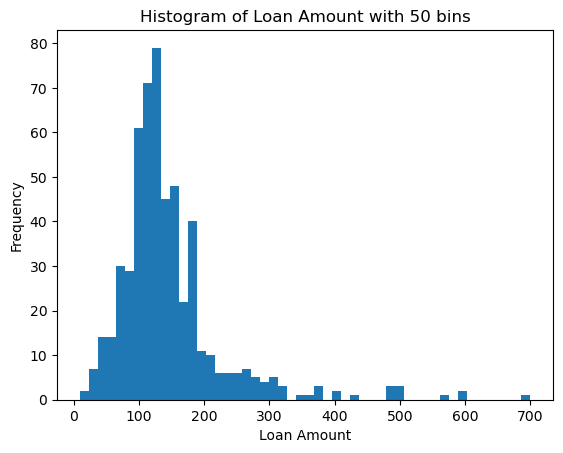

In [120]:
# Plotting the histogram of Loan Amount with 50 bins
plt.hist(df_numeric['LoanAmount'], bins=50)
plt.title('Histogram of Loan Amount with 50 bins')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

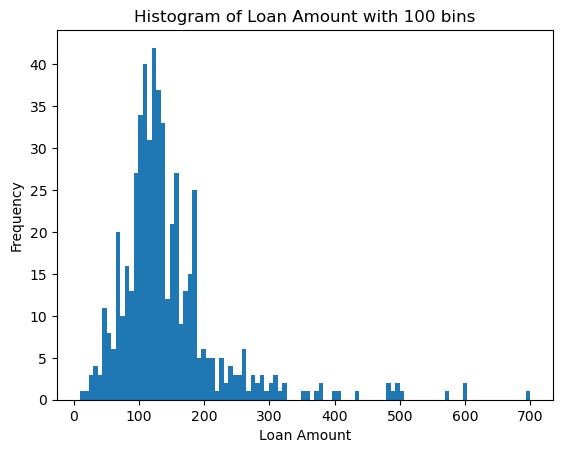

In [121]:
# Plotting the histogram of Loan Amount with 100 bins
plt.hist(df_numeric['LoanAmount'], bins=100)
plt.title('Histogram of Loan Amount with 100 bins')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

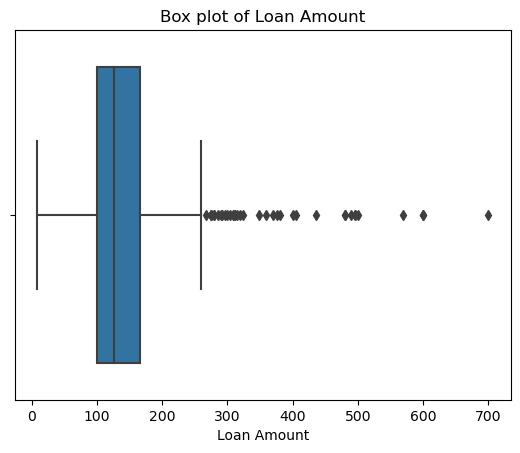

In [122]:
# Box plot of Loan Amount
sns.boxplot(x=df_numeric["LoanAmount"])
plt.title("Box plot of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

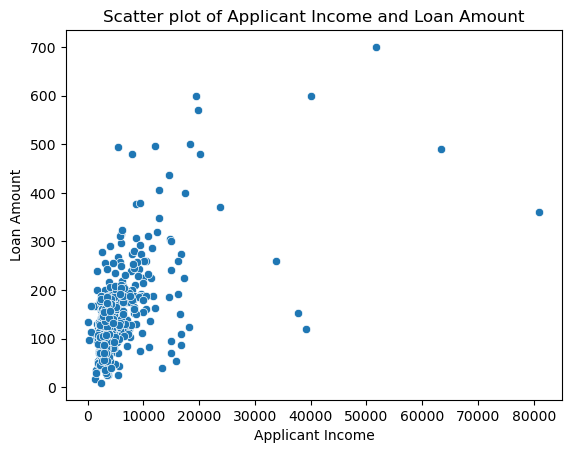

In [128]:
# Creating a scatter plot to see if there is any relationship between applicant income and loan amount
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df_numeric)
plt.title("Scatter plot of Applicant Income and Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [171]:
# First, let's read our df into 2 parts
df_categorical.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
6,Male,Yes,0,Not Graduate,No,Urban,Y
7,Male,Yes,3+,Graduate,No,Semiurban,N
8,Male,Yes,2,Graduate,No,Urban,Y
9,Male,Yes,1,Graduate,No,Semiurban,N


In [173]:
df_numeric.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
5,5417.0,4196.0,267.0,360.0,1.0
6,2333.0,1516.0,95.0,360.0,1.0
7,3036.0,2504.0,158.0,360.0,0.0
8,4006.0,1526.0,168.0,360.0,1.0
9,12841.0,10968.0,349.0,360.0,1.0


In [176]:
# Then, let's create a pivot table to summarize the data
# The pivot table 1 is aggregated by the mean of the Loan Amount
pivot_table_1 = pd.pivot_table(df, values='LoanAmount', index=['Gender', 'Self_Employed'], columns=['Education'], aggfunc='mean')
pivot_table_1

Education               Graduate  Not Graduate
Gender Self_Employed                          
Female No             121.176471    101.545455
       Yes            202.750000    137.500000
Male   No             153.311594    116.740741
       Yes            171.000000    129.000000

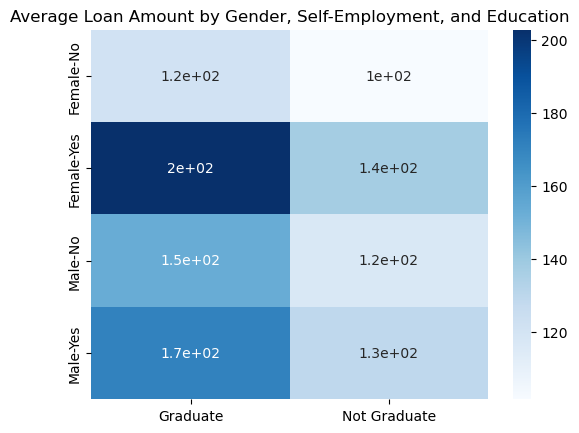

In [175]:
# Finally, let's create a heatmap to visualize the pivot table 1
sns.heatmap(pivot_table_1, annot=True, cmap='Blues')
plt.title('Average Loan Amount by Gender, Self-Employment, and Education')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From the pivot table 1, we could analyze our hypothesis about the applicants who get most of the loan as given by the gender male. In the heatmap, however, most of the applicants/coapplicants who got the highest average amount of loan were female, self-employed and graduated, in first place, and male, self-employed and graduated, in the second place. 

In [181]:
# The pivot table 2 is agreggated by the count of Loan Status (count of approved loan)
pivot_table_2 = pd.pivot_table(df, values='Loan_Status', index=['Gender', 'Married'], columns=['Education'], aggfunc='count')
pivot_table_2

Education       Graduate  Not Graduate
Gender Married                        
Female No             59            14
       Yes            23             4
Male   No             95            28
       Yes           252            74

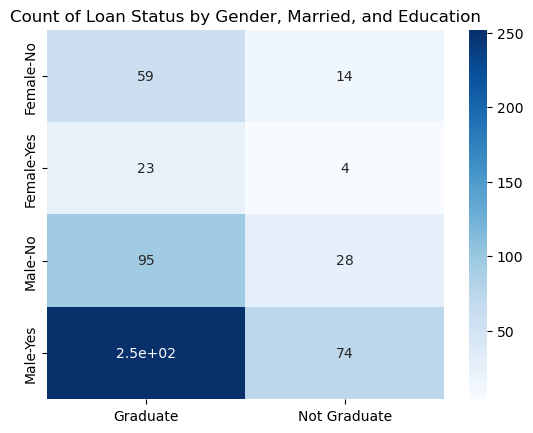

In [182]:
# Then, let's create a heatmap to visualize the pivot table 2
sns.heatmap(pivot_table_2, annot=True, cmap='Blues')
plt.title('Count of Loan Status by Gender, Married, and Education')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From this pivot table 2, it is noted that in regards of the count of the loan approved, the group of male, married (probably with a co-applicant) and graduated (high level of education) constitute the group of applicants who mostly likely are approved to get the loan. Therefore, with that, we can validate the hypothesis that gender, education and being pared up with another income are factors to be considered in the loan approval. 

In [183]:
# The pivot table 3 is agreggated by count of the Loan Status (count of approved loan)
pivot_table_3 = pd.pivot_table(df, values='Loan_Status', index=['Gender', 'Married'], columns=['Property_Area'], aggfunc='count')
pivot_table_3

Property_Area   Rural  Semiurban  Urban
Gender Married                         
Female No          17         33     23
       Yes          4         17      6
Male   No          43         41     39
       Yes         97        119    110

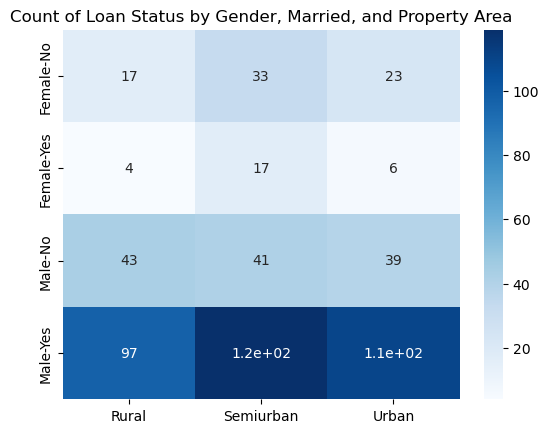

In [184]:
# Then, let's create a heatmap to visualize the pivot table 3
sns.heatmap(pivot_table_3, annot=True, cmap='Blues')
plt.title('Count of Loan Status by Gender, Married, and Property Area')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Finally, with the pivot table 3, we could check that by living in a semiurban area the applicant/co-applicant is more likely to be approved to receive a loan. Therefore, the property area is another factor that influences the loan approval.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

As we already handled the missing values of the credit history at the beginning of our EDA by dropping the missing values rows of this column, now we are going to deal with the missing values for the other columns.

In [186]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    float64
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(5), object(8)
memory usage: 61.7+ KB


In [ ]:
# Filling the Loan_Amount_Term null rows with 

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python